## Use Case
Building a machine learning model to accurately predict if patient have diabetes

## **Dataset details:**
- **Gender**: gender
- **Age**: age
- **Hypertension**: hypertension
- **Heart Disease**: heart_disease
- **Smoking History**: smoking_history
- **BMI**: bmi
- **Average Blood Glucose levels**: HbA1c_level
- **Blood Glucose Level**: blood_glucose_level
- **Outcome**: diabetes

# 1) Exploratory Data Analysis

In [1]:
#Installation of required libraries
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import warnings
warnings.simplefilter(action = "ignore") 

In [2]:
# Load the new dataset
csv_file_path = "diabetes_prediction_dataset.csv"
df = pd.read_csv(csv_file_path)

# Renaming columns to match the new dataset structure
df.rename(columns={
    'gender': 'Gender',
    'age': 'Age',
    'hypertension': 'Hypertension',
    'heart_disease': 'Heart_Disease',
    'smoking_history': 'Smoking_History',
    'bmi': 'BMI',
    'HbA1c_level': 'HbA1c_Level',
    'blood_glucose_level': 'Blood_Glucose_Level',
    'diabetes': 'Outcome'
}, inplace=True)

# Display basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Gender               100000 non-null  object 
 1   Age                  100000 non-null  float64
 2   Hypertension         100000 non-null  int64  
 3   Heart_Disease        100000 non-null  int64  
 4   Smoking_History      100000 non-null  object 
 5   BMI                  100000 non-null  float64
 6   HbA1c_Level          100000 non-null  float64
 7   Blood_Glucose_Level  100000 non-null  int64  
 8   Outcome              100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


,Gender,Age,Hypertension,Heart_Disease,Smoking_History,BMI,HbA1c_Level,Blood_Glucose_Level,Outcome
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
# The first 5 observation units of the data set were accessed.
df.head()

,Gender,Age,Hypertension,Heart_Disease,Smoking_History,BMI,HbA1c_Level,Blood_Glucose_Level,Outcome
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
# The size of the data set was examined. It consists of 768 observation units and 9 variables.
df.shape

(150573, 9)

In [6]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150573 entries, 0 to 150572
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Gender               150573 non-null  object 
 1   Age                  150573 non-null  float64
 2   Hypertension         150573 non-null  float64
 3   Heart_Disease        150573 non-null  float64
 4   Smoking_History      150573 non-null  object 
 5   BMI                  150573 non-null  float64
 6   HbA1c_Level          150573 non-null  float64
 7   Blood_Glucose_Level  150573 non-null  float64
 8   Outcome              150573 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 10.3+ MB


In [7]:
# Descriptive statistics of the data set accessed.
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Age,150573.0,48.272787,22.158262,0.029812,15.000000,32.0,51.421855,66.000000,77.000000,80.000000,81.943521,88.912408
Hypertension,150573.0,0.131859,0.338819,-0.107416,-0.011557,0.0,0.000000,0.006523,0.988052,1.000000,1.033065,1.107011
Heart_Disease,150573.0,0.076183,0.265586,-0.078066,-0.010103,0.0,0.000000,0.000000,0.028252,0.997498,1.018971,1.066688
BMI,150573.0,28.893967,7.326043,10.010000,20.650000,25.2,27.320000,32.001528,38.399788,42.839045,52.358007,95.690000
HbA1c_Level,150573.0,5.999486,1.262821,3.500000,4.000000,5.0,6.053746,6.600000,7.554115,8.752093,9.049442,9.456586
Blood_Glucose_Level,150573.0,156.909029,54.400450,80.000000,90.000000,126.0,151.654324,161.459827,243.240659,279.371793,301.912683,313.864989
Outcome,150573.0,0.392321,0.488269,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
# The distribution of the Outcome variable was examined.
df["Outcome"].value_counts()*100/len(df)

Outcome
0    91.5
1     8.5
Name: count, dtype: float64

In [4]:
# The classes of the outcome variable were examined.
df.Outcome.value_counts()

Outcome
0    91500
1     8500
Name: count, dtype: int64

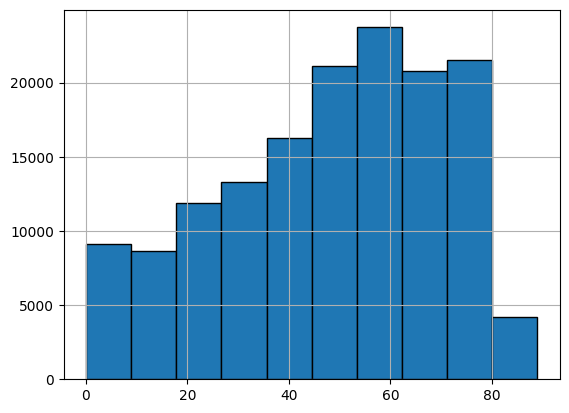

In [10]:
# The histagram of the Age variable was reached.
df["Age"].hist(edgecolor = "black");

In [11]:
print("Max Age: " + str(df["Age"].max()) + " Min Age: " + str(df["Age"].min()))

Max Age: 88.91240816 Min Age: 0.029812208


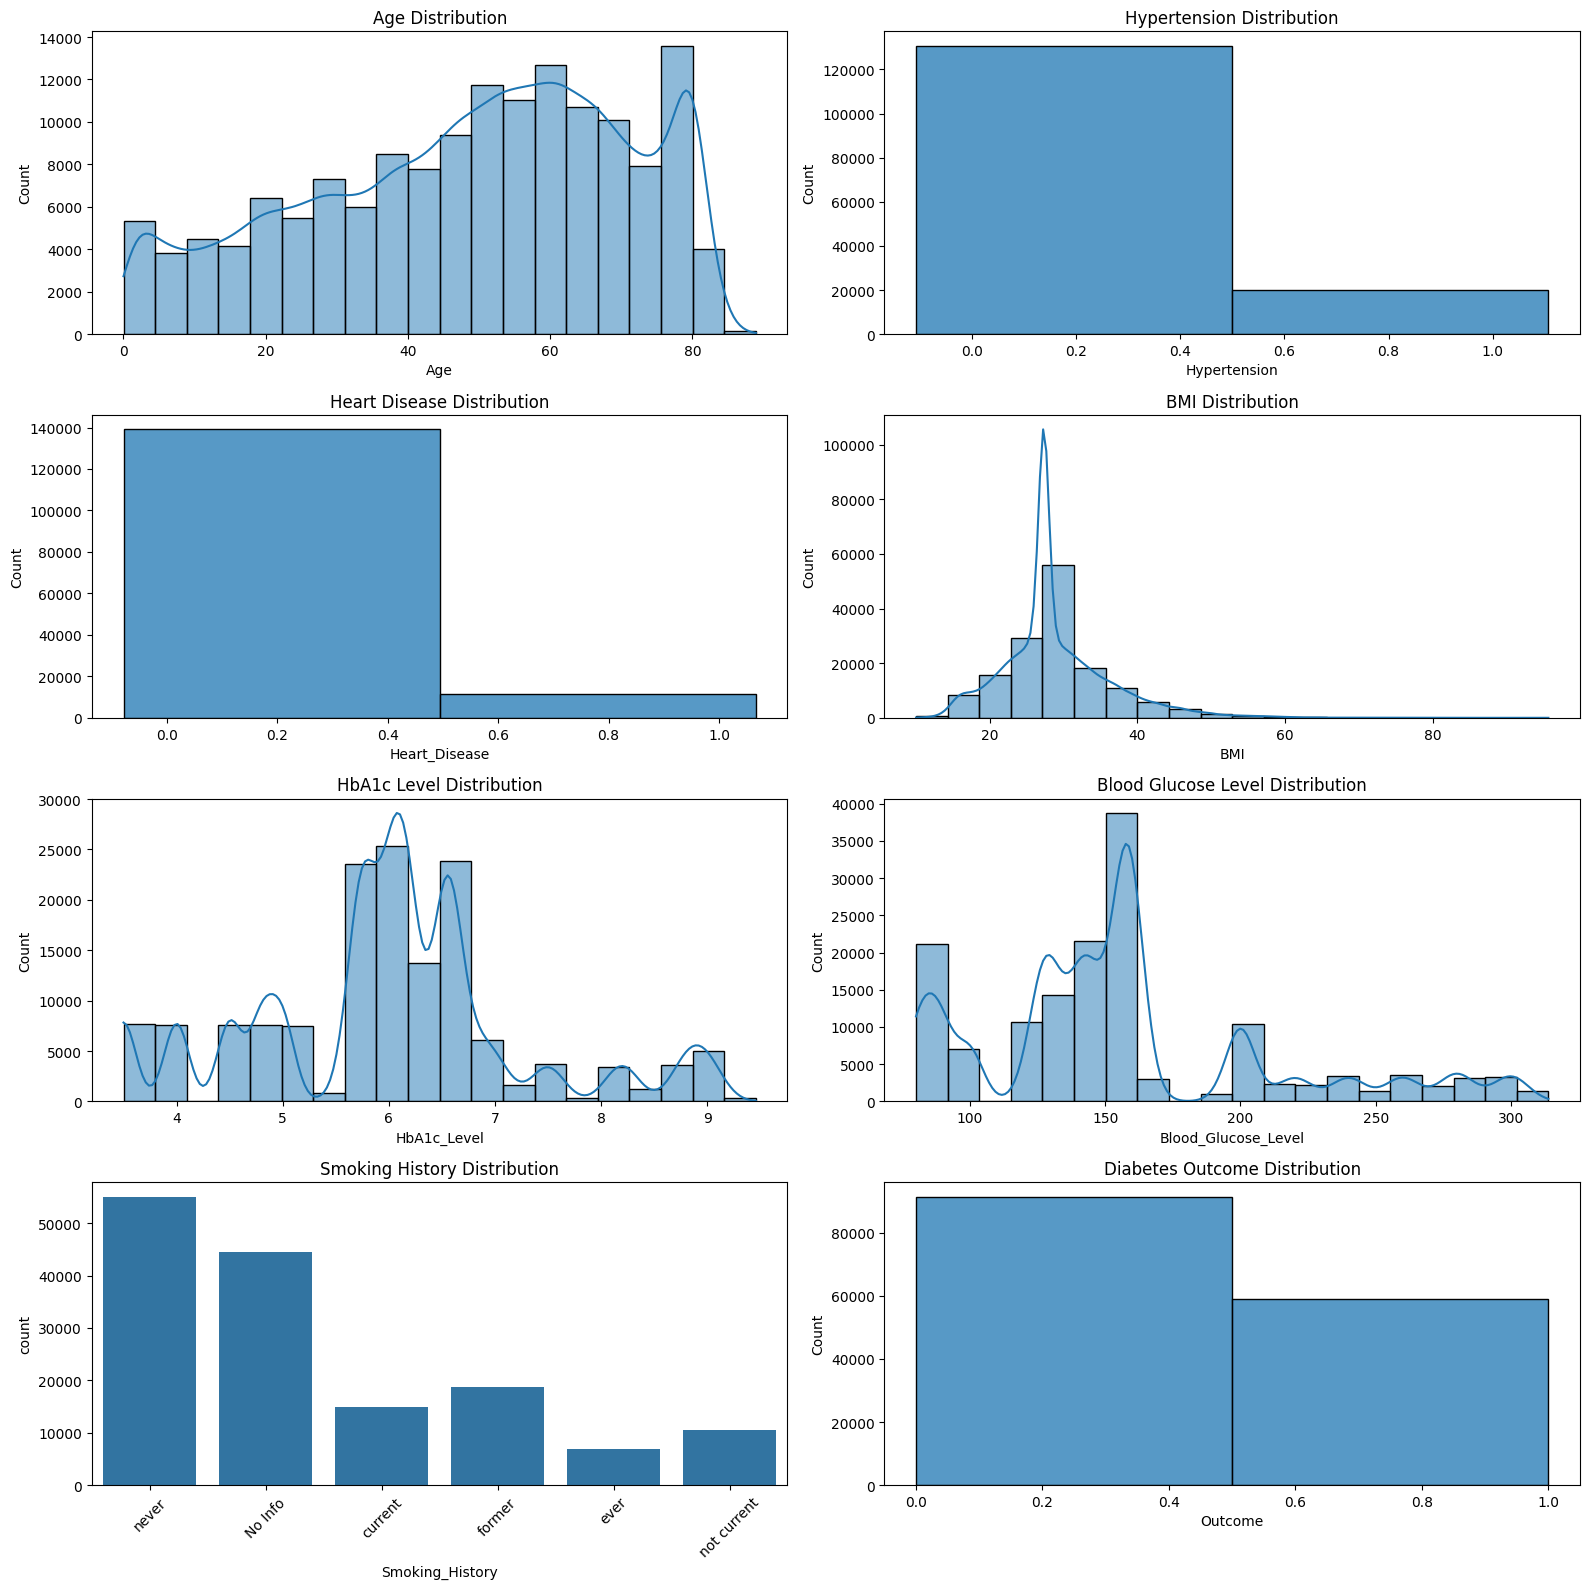

In [12]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.histplot(df.Age, bins=20, kde=True, ax=ax[0, 0])
ax[0, 0].set_title("Age Distribution")

sns.histplot(df.Hypertension, bins=2, kde=False, ax=ax[0, 1])
ax[0, 1].set_title("Hypertension Distribution")

sns.histplot(df.Heart_Disease, bins=2, kde=False, ax=ax[1, 0])
ax[1, 0].set_title("Heart Disease Distribution")

sns.histplot(df.BMI, bins=20, kde=True, ax=ax[1, 1])
ax[1, 1].set_title("BMI Distribution")

sns.histplot(df.HbA1c_Level, bins=20, kde=True, ax=ax[2, 0])
ax[2, 0].set_title("HbA1c Level Distribution")

sns.histplot(df.Blood_Glucose_Level, bins=20, kde=True, ax=ax[2, 1])
ax[2, 1].set_title("Blood Glucose Level Distribution")

sns.countplot(x=df.Smoking_History, ax=ax[3, 0])
ax[3, 0].set_title("Smoking History Distribution")
ax[3, 0].set_xticklabels(ax[3, 0].get_xticklabels(), rotation=45)

sns.histplot(df.Outcome, bins=2, kde=False, ax=ax[3, 1])
ax[3, 1].set_title("Diabetes Outcome Distribution")

plt.tight_layout()
plt.show()

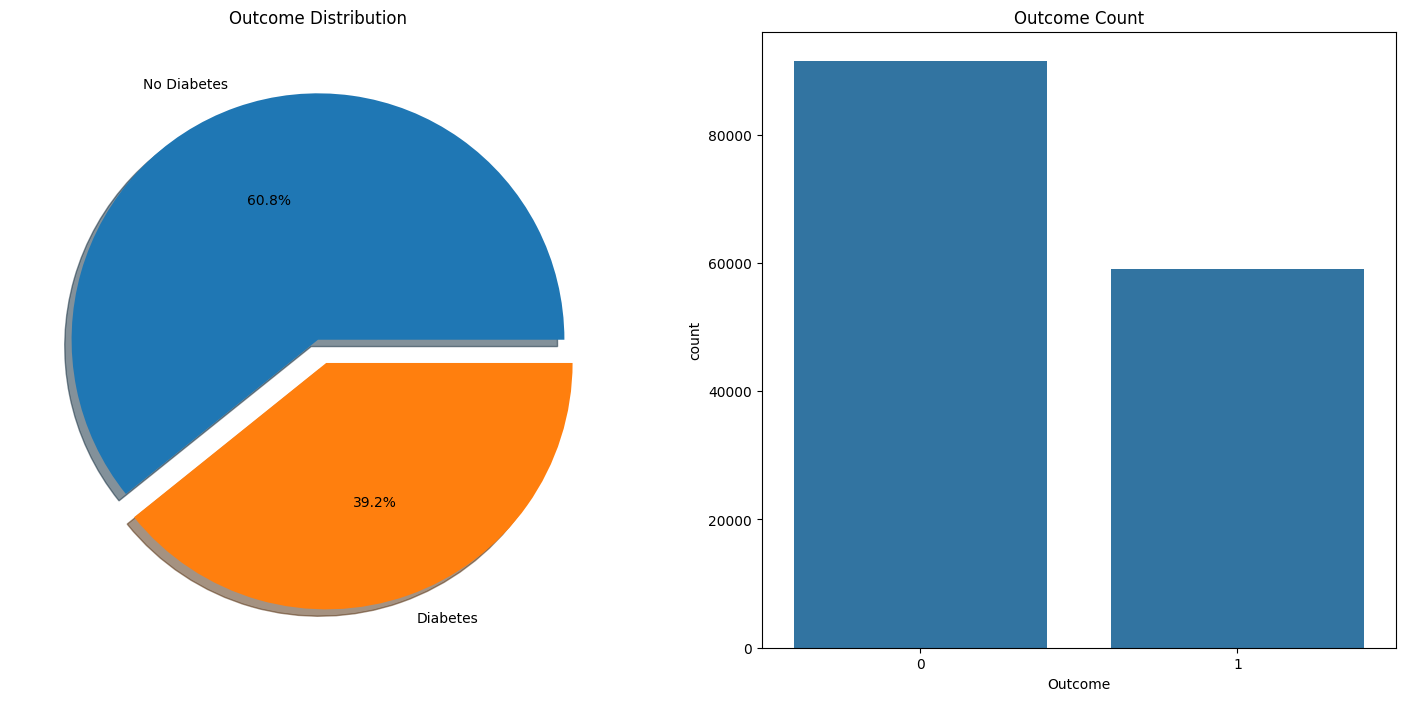

In [13]:
# The distribution of the outcome variable in the data was examined and visualized.
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Outcome'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True, labels=['No Diabetes', 'Diabetes']
)
ax[0].set_title('Outcome Distribution')
ax[0].set_ylabel('')
sns.countplot(x='Outcome', data=df, ax=ax[1])  # Corrected the x argument
ax[1].set_title('Outcome Count')

plt.show()

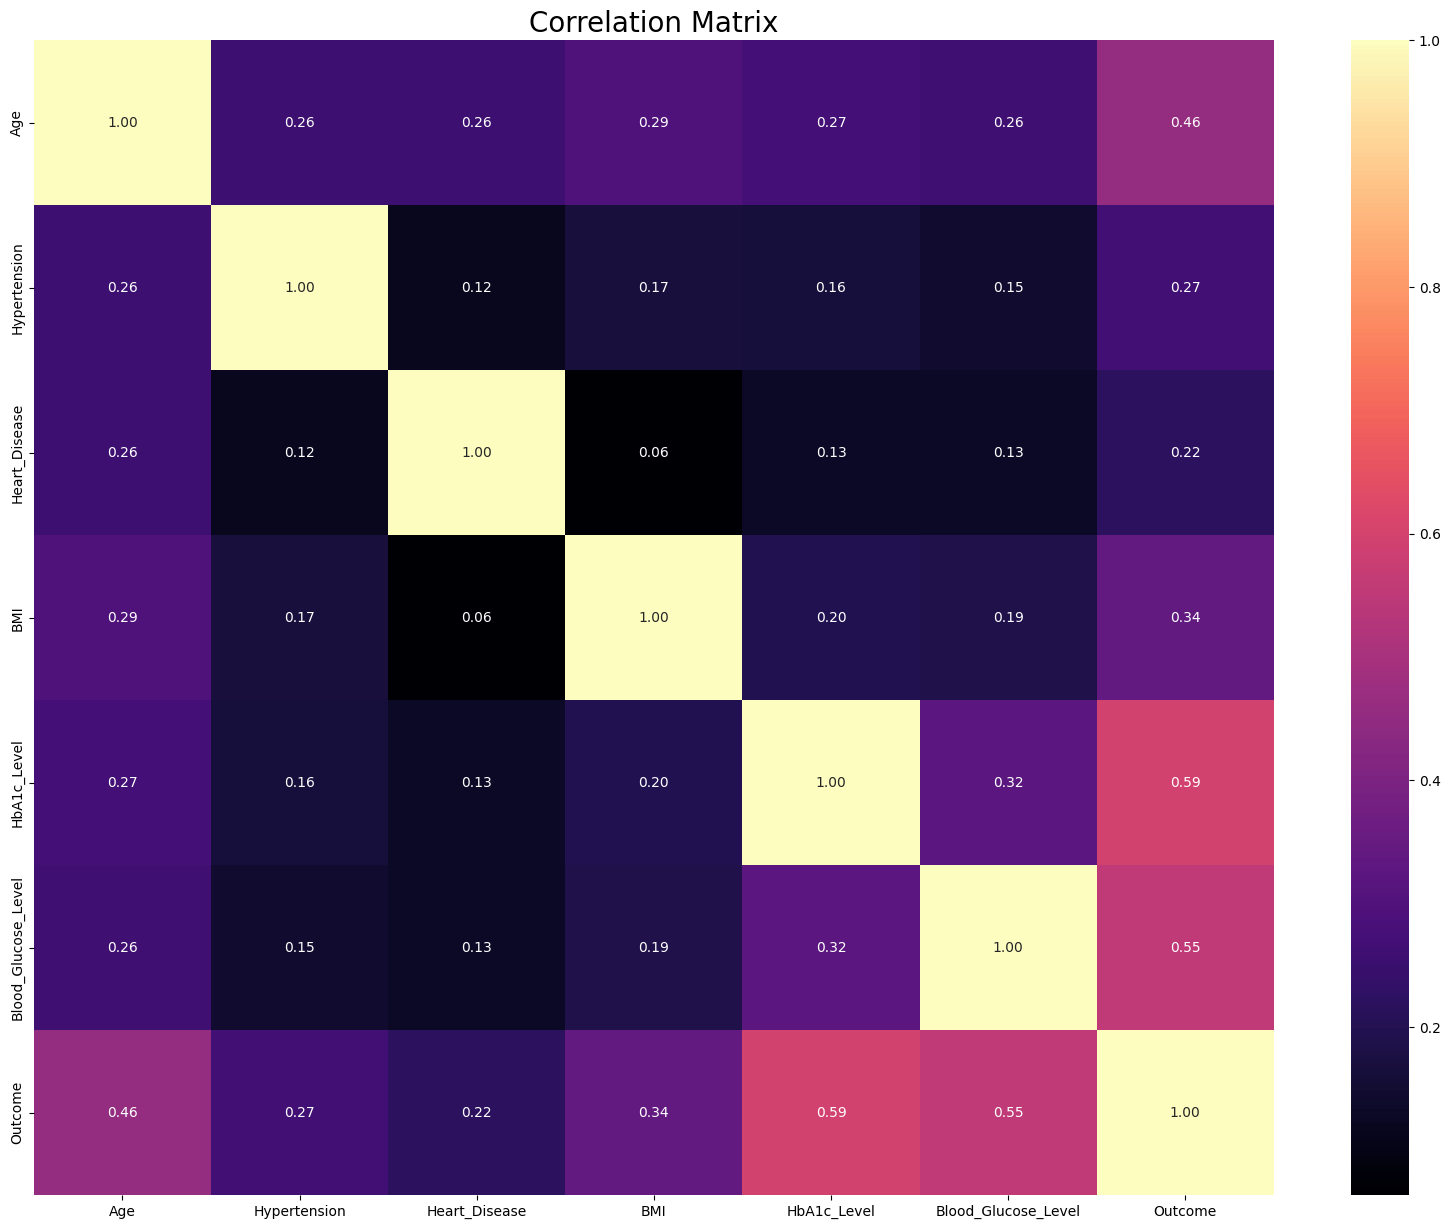

In [14]:
# Correlation matrix graph of the data set
# Select only numerical columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Correlation matrix heatmap
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)

plt.show()

# 2) Data Preprocessing

## 2.1) Missing Observation Analysis

We notice that some features contain 0, it doesn't make sense here and this indicates missing value Below we replace 0 value by NaN:

In [3]:
df[['BMI', 'Blood_Glucose_Level', 'HbA1c_Level']] = df[['BMI', 'Blood_Glucose_Level', 'HbA1c_Level']].replace(0, np.nan)
# Check for missing values
df.isnull().sum()

Gender                 0
Age                    0
Hypertension           0
Heart_Disease          0
Smoking_History        0
BMI                    0
HbA1c_Level            0
Blood_Glucose_Level    0
Outcome                0
dtype: int64

## 2.2) Outlier Observation Analysis

BMI yes (Outliers detected)
HbA1c_Level yes (Outliers detected)
Blood_Glucose_Level yes (Outliers detected)


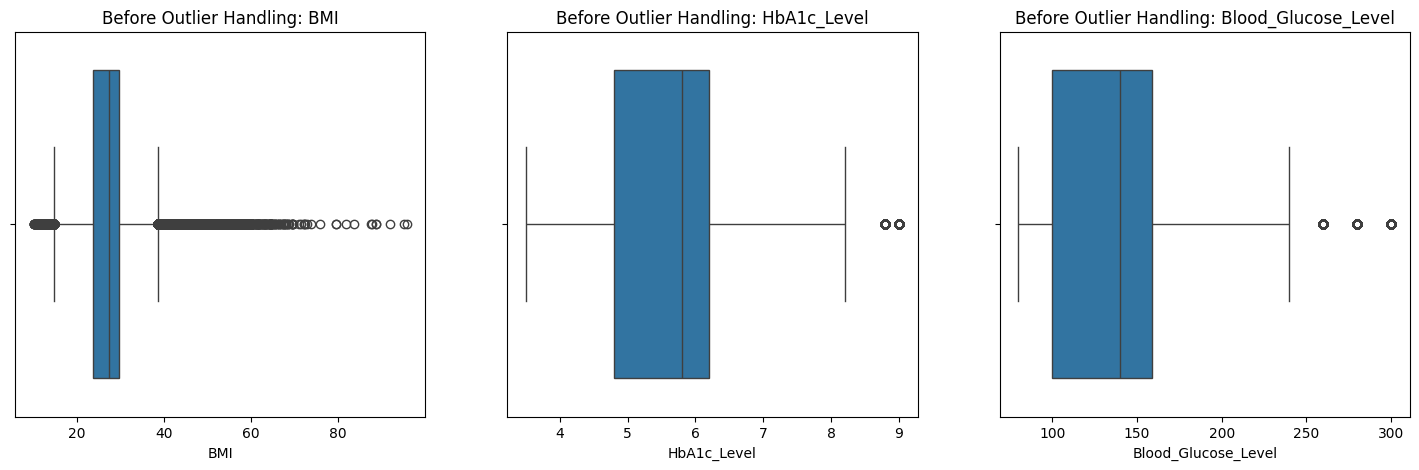

In [4]:
# In the data set, there were asked whether there were any outlier observations compared to the 25% and 75% quarters.
# List of features to check for outliers
features_to_check = ['BMI', 'HbA1c_Level', 'Blood_Glucose_Level']
for feature in features_to_check:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Check if any values exceed the upper bound (outliers)
    if (df[feature] > upper).any() or (df[feature] < lower).any():
        print(feature, "yes (Outliers detected)")
    else:
        print(feature, "no (No outliers)")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, feature in enumerate(features_to_check):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f"Before Outlier Handling: {feature}")
plt.show()

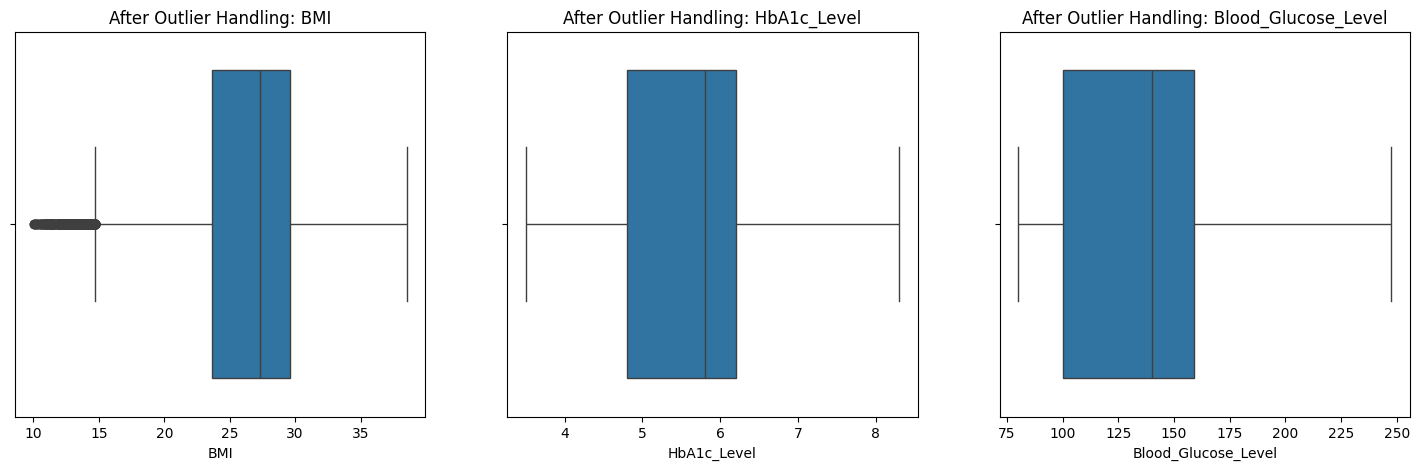

In [5]:
for feature in features_to_check:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR  # We only cap upper outliers
    
    # Replace values above the upper bound with the upper bound
    df.loc[df[feature] > upper, feature] = upper

# Plot after handling outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, feature in enumerate(features_to_check):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f"After Outlier Handling: {feature}")
plt.show()

## 2.3)  Local Outlier Factor (LOF) I dont think we need this? can ignore these entire chunk

In [18]:
# We determine outliers between all variables with the LOF method
# from sklearn.neighbors import LocalOutlierFactor
# lof =LocalOutlierFactor(n_neighbors= 10)
# lof.fit_predict(df)

In [19]:
# df_scores = lof.negative_outlier_factor_
# np.sort(df_scores)[0:30]

In [20]:
# #We choose the threshold value according to lof scores
# threshold = np.sort(df_scores)[7]
# threshold

In [21]:
#We delete those that are higher than the threshold
# outlier = df_scores > threshold
# df = df[outlier]

In [22]:
# The size of the data set was examined.
# df.shape

# 3) Feature Engineering

Creating new variables is important for models. But you need to create a logical new variable. For this data set, some new variables were created according to BMI, Insulin and glucose variables.

In [6]:
# BMI Categorical Mapping
df["NewBMI"] = "NaN"
df.loc[df["BMI"] < 18.5, "NewBMI"] = "Underweight"
df.loc[(df["BMI"] >= 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = "Normal"
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = "Overweight"
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = "Obesity 1"
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = "Obesity 2"
df.loc[df["BMI"] > 39.9, "NewBMI"] = "Obesity 3"
df["NewBMI"] = df["NewBMI"].astype("category")

# HbA1c Level Categorical Mapping
df["NewHbA1cLevel"] = "NaN"
df.loc[df["HbA1c_Level"] < 5.7, "NewHbA1cLevel"] = "Normal"
df.loc[(df["HbA1c_Level"] >= 5.7) & (df["HbA1c_Level"] < 6.5), "NewHbA1cLevel"] = "Prediabetic"
df.loc[df["HbA1c_Level"] >= 6.5, "NewHbA1cLevel"] = "Diabetic"
df["NewHbA1cLevel"] = df["NewHbA1cLevel"].astype("category")

# Blood Glucose Level Categorical Mappinnmg
df["NewGlucose"] = "NaN"
df.loc[df["Blood_Glucose_Level"] <= 70, "NewGlucose"] = "Low"
df.loc[(df["Blood_Glucose_Level"] > 70) & (df["Blood_Glucose_Level"] <= 99), "NewGlucose"] = "Normal"
df.loc[(df["Blood_Glucose_Level"] > 99) & (df["Blood_Glucose_Level"] <= 126), "NewGlucose"] = "Prediabetic"
df.loc[df["Blood_Glucose_Level"] > 126, "NewGlucose"] = "Diabetic"
df["NewGlucose"] = df["NewGlucose"].astype("category")

df.head()
print(df.columns)

Index(['Gender', 'Age', 'Hypertension', 'Heart_Disease', 'Smoking_History',
       'BMI', 'HbA1c_Level', 'Blood_Glucose_Level', 'Outcome', 'NewBMI',
       'NewHbA1cLevel', 'NewGlucose'],
      dtype='object')


# 4) One Hot Encoding

Categorical variables in the data set should be converted into numerical values. For this reason, these transformation processes are performed with Label Encoding and One Hot Encoding method.

In [ ]:
df = pd.get_dummies(df, columns =["NewBMI","NewHbA1cLevel", "NewGlucose"], drop_first = True)

df["Gender"] = LabelEncoder().fit_transform(df["Gender"]) # Encode Gender (Binary: Male=1, Female=0)

df = pd.get_dummies(df, columns=["Smoking_History"], drop_first=True)

df = df.astype(int)

# Display the new categorical DataFrame
df.head()

Index(['Gender', 'Age', 'Hypertension', 'Heart_Disease', 'BMI', 'HbA1c_Level',
       'Blood_Glucose_Level', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Overweight', 'NewBMI_Underweight',
       'NewHbA1cLevel_Normal', 'NewHbA1cLevel_Prediabetic',
       'NewGlucose_Normal', 'NewGlucose_Prediabetic',
       'Smoking_History_current', 'Smoking_History_ever',
       'Smoking_History_former', 'Smoking_History_never',
       'Smoking_History_not current'],
      dtype='object')


In [8]:
y = df["Outcome"]
print(df.columns)
X = df.drop(["Outcome", "NewHbA1cLevel_Normal", "NewGlucose_Normal"], axis=1)
cols = X.columns
index = X.index
X.head()

Index(['Gender', 'Age', 'Hypertension', 'Heart_Disease', 'BMI', 'HbA1c_Level',
       'Blood_Glucose_Level', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Overweight', 'NewBMI_Underweight',
       'NewHbA1cLevel_Normal', 'NewHbA1cLevel_Prediabetic',
       'NewGlucose_Normal', 'NewGlucose_Prediabetic',
       'Smoking_History_current', 'Smoking_History_ever',
       'Smoking_History_former', 'Smoking_History_never',
       'Smoking_History_not current'],
      dtype='object')


,Gender,Age,Hypertension,Heart_Disease,BMI,HbA1c_Level,Blood_Glucose_Level,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Overweight,NewBMI_Underweight,NewHbA1cLevel_Prediabetic,NewGlucose_Prediabetic,Smoking_History_current,Smoking_History_ever,Smoking_History_former,Smoking_History_never,Smoking_History_not current
0,0,80,0,1,25,6,140,0,0,1,0,0,0,0,0,0,1,0
1,0,54,0,0,27,6,80,0,0,1,0,0,0,0,0,0,0,0
2,1,28,0,0,27,5,158,0,0,1,0,1,0,0,0,0,1,0
3,0,36,0,0,23,5,155,0,0,0,0,0,0,1,0,0,0,0
4,1,76,1,1,20,4,155,0,0,0,0,0,0,1,0,0,0,0


In [9]:
# The variables in the data set are an effective factor in increasing the performance of the models by standardization.  
# There are multiple standardization methods. These are methods such as" Normalize"," MinMax"," Robust" and "Scale".
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)
X.head()

,Gender,Age,Hypertension,Heart_Disease,BMI,HbA1c_Level,Blood_Glucose_Level,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Overweight,NewBMI_Underweight,NewHbA1cLevel_Prediabetic,NewGlucose_Prediabetic,Smoking_History_current,Smoking_History_ever,Smoking_History_former,Smoking_History_never,Smoking_History_not current
0,0.0,1.027778,0.0,1.0,-0.333333,0.5,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.305556,0.0,0.0,0.000000,0.5,-1.016949,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,-0.416667,0.0,0.0,0.000000,0.0,0.305085,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,-0.194444,0.0,0.0,-0.666667,0.0,0.254237,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.916667,1.0,1.0,-1.166667,-0.5,0.254237,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Outcome, dtype: int64

### Splitting Data into 3 Sets (Train, Test, Dev)

Train set shape: (70000, 20), (70000,)
Development set shape: (15000, 20), (15000,)
Test set shape: (15000, 20), (15000,)


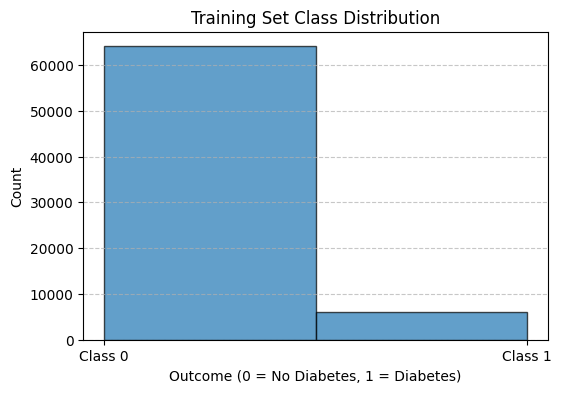

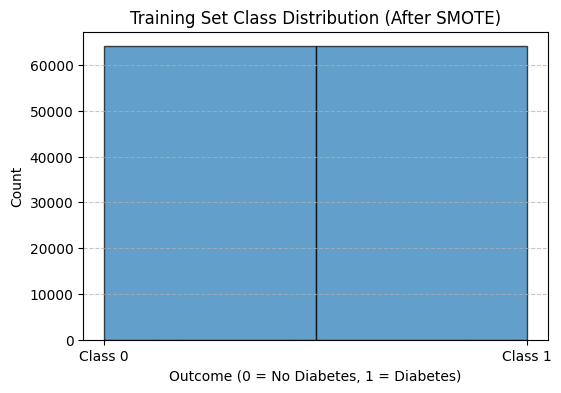

In [13]:
from imblearn.over_sampling import SMOTE

# print(df.columns)

# Separate features and target variable
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# First, split into training (70%) and remaining (30%)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Then, split the remaining into development (15%) and test (15%)
X_dev, X_test, y_dev, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42, stratify=y_rem)

# Print dataset shapes
print(f"Train set shape: {X_train.shape}, {y_train.shape}")
print(f"Development set shape: {X_dev.shape}, {y_dev.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

# Plot Class Distribution Before SMOTE
def plot_class_distribution(y_data, title):
    plt.figure(figsize=(6,4))
    plt.hist(y_data, bins=2, edgecolor='black', alpha=0.7)
    plt.xticks([0,1], labels=['Class 0', 'Class 1'])
    plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
    plt.ylabel("Count")
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Plot BEFORE applying SMOTE
plot_class_distribution(y_train, "Training Set Class Distribution")
# plot_class_distribution(y_dev, "Development Set Class Distribution")
# plot_class_distribution(y_test, "Test Set Class Distribution")

# Apply SMOTE (Only on Training Set)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Plot AFTER applying SMOTE
plot_class_distribution(y_train_smote, "Training Set Class Distribution (After SMOTE)")


Train set shape: (70000, 20), (70000,)
Development set shape: (15000, 20), (15000,)
Test set shape: (15000, 20), (15000,)


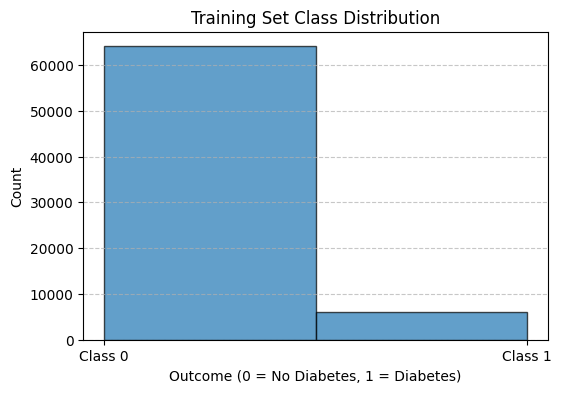

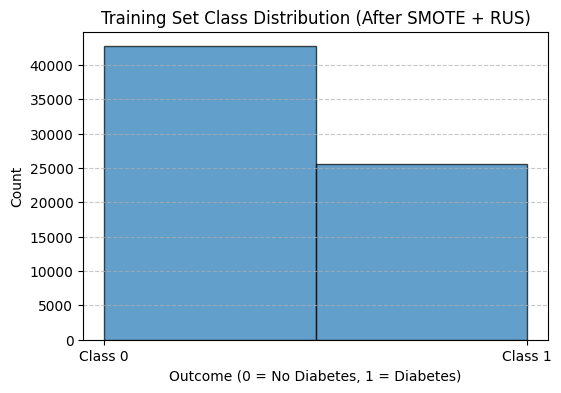

In [11]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# print(df.columns)

# Separate features and target variable
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# First, split into training (70%) and remaining (30%)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Then, split the remaining into development (15%) and test (15%)
X_dev, X_test, y_dev, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42, stratify=y_rem)

# Print dataset shapes
print(f"Train set shape: {X_train.shape}, {y_train.shape}")
print(f"Development set shape: {X_dev.shape}, {y_dev.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

# Plot Class Distribution Before SMOTE
def plot_class_distribution(y_data, title):
    plt.figure(figsize=(6,4))
    plt.hist(y_data, bins=2, edgecolor='black', alpha=0.7)
    plt.xticks([0,1], labels=['Class 0', 'Class 1'])
    plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
    plt.ylabel("Count")
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Plot BEFORE applying SMOTE
plot_class_distribution(y_train, "Training Set Class Distribution")

# Apply SMOTE + RUS Hybrid
smote = SMOTE(sampling_strategy=0.4, random_state=42)  # SMOTE first (40% minority cases)
rus = RandomUnderSampler(sampling_strategy=0.6, random_state=42)  # Then RUS (60% majority cases)

# Apply SMOTE first, then RUS
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_balanced, y_train_balanced = rus.fit_resample(X_train_smote, y_train_smote)

# Plot AFTER applying SMOTE + RUS
plot_class_distribution(y_train_balanced, "Training Set Class Distribution (After SMOTE + RUS)")


Before Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report

# ✅ Step 1: Define Random Forest Model
rf_model = RandomForestClassifier()

# ✅ Step 2: Train Random Forest Model
rf_model.fit(X_train_balanced, y_train_balanced)

# ✅ Step 3: Make Predictions
y_pred_rf = rf_model.predict(X_test)

# ✅ Step 4: Compute Accuracy & Balanced Accuracy
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
test_balanced_accuracy_rf = balanced_accuracy_score(y_test, y_pred_rf)

# ✅ Step 5: Print Scores
print("\n🚀 **Random Forest Model Performance** 🚀")
print(f"Test Accuracy: {test_accuracy_rf:.4f}")
print(f"Test Balanced Accuracy: {test_balanced_accuracy_rf:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))



🚀 **Random Forest Model Performance** 🚀
Test Accuracy: 0.9373
Test Balanced Accuracy: 0.8519

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97     13725
           1       0.61      0.75      0.67      1275

    accuracy                           0.94     15000
   macro avg       0.79      0.85      0.82     15000
weighted avg       0.94      0.94      0.94     15000



In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report

# ✅ Step 1: Define XGBoost Model
xgb_model = XGBClassifier()

# ✅ Step 2: Train XGBoost Model
xgb_model.fit(X_train_balanced, y_train_balanced)

# ✅ Step 3: Make Predictions
y_pred_xgb = xgb_model.predict(X_test)

# ✅ Step 4: Compute Accuracy & Balanced Accuracy
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
test_balanced_accuracy_xgb = balanced_accuracy_score(y_test, y_pred_xgb)

# ✅ Step 5: Print Scores
print("\n🚀 **XGBoost Model Performance** 🚀")
print(f"Test Accuracy: {test_accuracy_xgb:.4f}")
print(f"Test Balanced Accuracy: {test_balanced_accuracy_xgb:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))



🚀 **XGBoost Model Performance** 🚀
Test Accuracy: 0.9332
Test Balanced Accuracy: 0.8653

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96     13725
           1       0.58      0.78      0.67      1275

    accuracy                           0.93     15000
   macro avg       0.78      0.87      0.81     15000
weighted avg       0.95      0.93      0.94     15000



In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report

# ✅ Step 1: Define XGBoost Model
xgb_model = XGBClassifier(
    objective="binary:logistic",
    learning_rate=0.05,
    n_estimators=100,
    max_depth=6,
    scale_pos_weight=0.8,  # Adjusted to reduce bias toward predicting "diabetes"
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

# ✅ Step 2: Train XGBoost Model
xgb_model.fit(X_train_balanced, y_train_balanced)

# ✅ Step 3: Make Predictions
y_pred_xgb = xgb_model.predict(X_test)

# ✅ Step 4: Compute Accuracy & Balanced Accuracy
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
test_balanced_accuracy_xgb = balanced_accuracy_score(y_test, y_pred_xgb)

# ✅ Step 5: Print Scores
print("\n🚀 **XGBoost Model Performance** 🚀")
print(f"Test Accuracy: {test_accuracy_xgb:.4f}")
print(f"Test Balanced Accuracy: {test_balanced_accuracy_xgb:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))



🚀 **XGBoost Model Performance** 🚀
Test Accuracy: 0.9407
Test Balanced Accuracy: 0.8641

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97     13725
           1       0.62      0.77      0.69      1275

    accuracy                           0.94     15000
   macro avg       0.80      0.86      0.83     15000
weighted avg       0.95      0.94      0.94     15000



In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report
from lightgbm import early_stopping

# ✅ Step 1: Define LightGBM Model
lgb_model = lgb.LGBMClassifier()

# ✅ Step 2: Train LightGBM with Early Stopping Using Callbacks
lgb_model.fit(
    X_train_balanced, y_train_balanced,
    eval_set=[(X_test, y_test)],  # Validation set
    eval_metric="logloss",
    callbacks=[early_stopping(10)]  # ✅ Use callbacks instead of early_stopping_rounds
)

# ✅ Step 3: Make Predictions
y_pred = lgb_model.predict(X_test)

# ✅ Step 4: Compute Accuracy & Balanced Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# ✅ Step 5: Print Scores
print("\n🚀 **LightGBM Model Performance** 🚀")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Balanced Accuracy: {test_balanced_accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 25620, number of negative: 42700
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 178
[LightGBM] [Info] Number of data points in the train set: 68320, number of used features: 20
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375000 -> initscore=-0.510826
[LightGBM] [Info] Start training from score -0.510826
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.21615

🚀 **LightGBM Model Performance** 🚀
Test Accuracy: 0.8807
Test Balanced Accuracy: 0.8985

Classification Report:
               precis

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report

log_reg_pipeline = LogisticRegression()

# ✅ Step 2: Train Logistic Regression Model
log_reg_pipeline.fit(X_train_balanced, y_train_balanced)

# ✅ Step 3: Make Predictions
y_pred_log_reg = log_reg_pipeline.predict(X_test)

# ✅ Step 4: Compute Accuracy & Balanced Accuracy
test_accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
test_balanced_accuracy_log_reg = balanced_accuracy_score(y_test, y_pred_log_reg)

# ✅ Step 5: Print Scores
print("\n🚀 **Logistic Regression Model Performance** 🚀")
print(f"Test Accuracy: {test_accuracy_log_reg:.4f}")
print(f"Test Balanced Accuracy: {test_balanced_accuracy_log_reg:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))


🚀 **Logistic Regression Model Performance** 🚀
Test Accuracy: 0.8947
Test Balanced Accuracy: 0.8457

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94     13725
           1       0.43      0.79      0.56      1275

    accuracy                           0.89     15000
   macro avg       0.71      0.85      0.75     15000
weighted avg       0.93      0.89      0.91     15000



In [ ]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report

# ✅ Step 1: Define XGBoost Model
xgb_model = XGBClassifier(
    # objective="binary:logistic",
    # learning_rate=0.05,
    # n_estimators=100,
    # max_depth=6,
    # scale_pos_weight=0.8,  # Adjusted to reduce bias toward predicting "diabetes"
    # use_label_encoder=False,
    # eval_metric="logloss",
    # random_state=42
)

# ✅ Step 2: Train XGBoost Model
xgb_model.fit(X_train_balanced, y_train_balanced)

# ✅ Step 3: Extract XGBoost Predictions (Probability Scores)
y_train_xgb = xgb_model.predict_proba(X_train_balanced)[:, 1]  # Use probabilities
X_test_xgb = xgb_model.predict_proba(X_test)[:, 1].reshape(-1, 1)  # Reshape for logistic regression

# ✅ Step 4: Standardize the Features (Needed for Logistic Regression)
scaler = StandardScaler()
y_train_xgb_scaled = scaler.fit_transform(y_train_xgb.reshape(-1, 1))
X_test_xgb_scaled = scaler.transform(X_test_xgb)

# ✅ Step 5: Train Logistic Regression on XGBoost Predictions
log_reg = LogisticRegression()
log_reg.fit(y_train_xgb_scaled, y_train_balanced)

# ✅ Step 6: Make Final Predictions Using Logistic Regression
y_pred_hybrid = log_reg.predict(X_test_xgb_scaled)

# ✅ Step 7: Compute Accuracy & Balanced Accuracy
test_accuracy_hybrid = accuracy_score(y_test, y_pred_hybrid)
test_balanced_accuracy_hybrid = balanced_accuracy_score(y_test, y_pred_hybrid)

# ✅ Step 8: Print Scores
print("\n🚀 **Hybrid Model (XGBoost + Logistic Regression) Performance** 🚀")
print(f"Test Accuracy: {test_accuracy_hybrid:.4f}")
print(f"Test Balanced Accuracy: {test_balanced_accuracy_hybrid:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_hybrid))


🚀 **Hybrid Model (XGBoost + Logistic Regression) Performance** 🚀
Test Accuracy: 0.9343
Test Balanced Accuracy: 0.8652

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96     13725
           1       0.59      0.78      0.67      1275

    accuracy                           0.93     15000
   macro avg       0.78      0.87      0.82     15000
weighted avg       0.95      0.93      0.94     15000



In [33]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score

# Define model names
model_names = [
    "Random Forest", "XGBoost", "LightGBM", "Logistic Regression", "Hybrid (XGBoost + Logistic Regression)"
]

# Initialize lists for metrics
accuracy_values = []
balanced_accuracy_values = []
precision_values = []
recall_values = []
f1_values = []

# Models and predictions dictionary
models_predictions = {
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    "LightGBM": y_pred,
    "Logistic Regression": y_pred_log_reg,
    "Hybrid (XGBoost + Logistic Regression)": y_pred_hybrid
}

# Collect performance metrics for each model
for model, y_pred in models_predictions.items():
    accuracy_values.append(accuracy_score(y_test, y_pred))
    balanced_accuracy_values.append(balanced_accuracy_score(y_test, y_pred))
    report = classification_report(y_test, y_pred, output_dict=True)
    precision_values.append(report['weighted avg']['precision'])
    recall_values.append(report['weighted avg']['recall'])
    f1_values.append(report['weighted avg']['f1-score'])

# Create DataFrame
results_df = pd.DataFrame({
    "Model": model_names,
    "Test Accuracy": accuracy_values,
    "Balanced Accuracy": balanced_accuracy_values,
    "Precision": precision_values,
    "Recall": recall_values,
    "F1-Score": f1_values
})

# Print the table
print("\n📊 **Model Performance Summary** 📊")
print(results_df.to_string(index=False))


📊 **Model Performance Summary** 📊
                                 Model  Test Accuracy  Balanced Accuracy  Precision   Recall  F1-Score
                         Random Forest       0.937267           0.851887   0.944695 0.937267  0.940231
                               XGBoost       0.940733           0.864097   0.948026 0.940733  0.943582
                              LightGBM       0.931867           0.872058   0.945858 0.931867  0.936915
                   Logistic Regression       0.894733           0.845719   0.932295 0.894733  0.907866
Hybrid (XGBoost + Logistic Regression)       0.934333           0.865224   0.945602 0.934333  0.938540


Hyperparameter Tuning

In [40]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# ✅ Step 1: Define Hyperparameter Grid for XGBoost
param_grid_xgb = {
    # "learning_rate": [0.01, 0.05, 0.1],
    # "n_estimators": [100, 200, 300],
    # "max_depth": [3, 5, 7],
    # "scale_pos_weight": [0.5, 1, 1.5]
    'learning_rate': [0.1], 
    'max_depth': [7], 
    'n_estimators': [300], 
    'scale_pos_weight': [1]

}

# ✅ Step 2: Perform GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(XGBClassifier(objective="binary:logistic", use_label_encoder=False, eval_metric="logloss", random_state=42), 
                               param_grid_xgb, scoring="accuracy", cv=3, verbose=1, n_jobs=-1)
grid_search_xgb.fit(X_train_balanced, y_train_balanced)

# ✅ Step 3: Train Best XGBoost Model
best_xgb = grid_search_xgb.best_estimator_
y_train_xgb = best_xgb.predict_proba(X_train_balanced)[:, 1]
X_test_xgb = best_xgb.predict_proba(X_test)[:, 1].reshape(-1, 1)

# ✅ Step 4: Standardize Features for Logistic Regression
scaler = StandardScaler()
y_train_xgb_scaled = scaler.fit_transform(y_train_xgb.reshape(-1, 1))
X_test_xgb_scaled = scaler.transform(X_test_xgb)

# ✅ Step 5: Define Hyperparameter Grid for Logistic Regression
param_grid_logreg = {
    # "C": [0.01, 0.1, 1, 10],
    # "solver": ["liblinear", "lbfgs"]
    'C': [0.01], 
    'solver': ['lbfgs']
}

# ✅ Step 6: Perform GridSearchCV for Logistic Regression
grid_search_logreg = GridSearchCV(LogisticRegression(class_weight="balanced", random_state=42),
                                   param_grid_logreg, scoring="accuracy", cv=3, verbose=1, n_jobs=-1)
grid_search_logreg.fit(y_train_xgb_scaled, y_train_balanced)

# ✅ Step 7: Train Best Logistic Regression Model
best_log_reg = grid_search_logreg.best_estimator_
y_pred_hybrid = best_log_reg.predict(X_test_xgb_scaled)

# ✅ Step 8: Compute Accuracy & Balanced Accuracy
test_accuracy_hybrid = accuracy_score(y_test, y_pred_hybrid)
test_balanced_accuracy_hybrid = balanced_accuracy_score(y_test, y_pred_hybrid)

# ✅ Step 9: Print Scores
print("\n🚀 **Optimized Hybrid Model (XGBoost + Logistic Regression) Performance** 🚀")
print(f"Best XGBoost Hyperparameters: {grid_search_xgb.best_params_}")
print(f"Best Logistic Regression Hyperparameters: {grid_search_logreg.best_params_}")
print(f"Test Accuracy: {test_accuracy_hybrid:.4f}")
print(f"Test Balanced Accuracy: {test_balanced_accuracy_hybrid:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_hybrid))


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits

🚀 **Optimized Hybrid Model (XGBoost + Logistic Regression) Performance** 🚀
Best XGBoost Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'scale_pos_weight': 1}
Best Logistic Regression Hyperparameters: {'C': 0.01, 'solver': 'lbfgs'}
Test Accuracy: 0.9270
Test Balanced Accuracy: 0.8698

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96     13725
           1       0.55      0.80      0.65      1275

    accuracy                           0.93     15000
   macro avg       0.76      0.87      0.81     15000
weighted avg       0.94      0.93      0.93     15000



# 5) Base Models

In [ ]:
# Validation scores of all base models

models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
# models.append(("LightGBM", LGBMClassifier(random_state = 12345)))

# Cross-validation setup (10-fold CV on training data)
kfold = KFold(n_splits=10, shuffle=True, random_state=12345)
# evaluate each model in turn
smote_train_results = []
test_results = []
results = []
names = []

Accuracy Scores for SMOTE Train Set and Test Set

In [ ]:
for name, model in models:
    # Cross-validation on SMOTE Training Set
    cv_results_train = cross_val_score(model, X_train_smote, y_train_smote, cv= 5, scoring="accuracy")
    smote_train_results.append(cv_results_train)

    # Train on the SMOTE Training Set
    model.fit(X_train_smote, y_train_smote)

    # Evaluate on the Test Set
    test_score = model.score(X_test, y_test)
    test_results.append(test_score)

    # Store names
    names.append(name)

    # Print results
    msg = f"{name}: SMOTE Train Accuracy = {cv_results_train.mean()*100:.2f}%, Std Dev = {cv_results_train.std()*100:.2f}% | Test Accuracy = {test_score*100:.2f}%"
    print(msg)


Model Performance Boxplot for SMOTE Train Set and Test Set

In [ ]:
# Create side-by-side boxplots for Training and Test sets
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Training Set Performance
axes[0].boxplot(smote_train_results)
axes[0].set_title('Training Set - Algorithm Comparison')
axes[0].set_xticklabels(names)
axes[0].set_ylabel("Accuracy")

# Test Set Performance
axes[1].bar(names, test_results, color="skyblue")
axes[1].set_title('Test Set - Model Accuracy')
axes[1].set_ylabel("Accuracy")
axes[1].set_ylim(0, 1)  # Scale from 0 to 100%

plt.tight_layout()
plt.show()

Accuracy Score + BoxPlot (SMOTE Train Set) --> for testing only, can remove after

LR: Accuracy = 89.74%, Std Dev = 1.51%
KNN: Accuracy = 93.42%, Std Dev = 0.12%
CART: Accuracy = 95.16%, Std Dev = 1.17%
RF: Accuracy = 95.93%, Std Dev = 1.47%
SVM: Accuracy = 92.80%, Std Dev = 0.35%
XGB: Accuracy = 92.21%, Std Dev = 1.03%


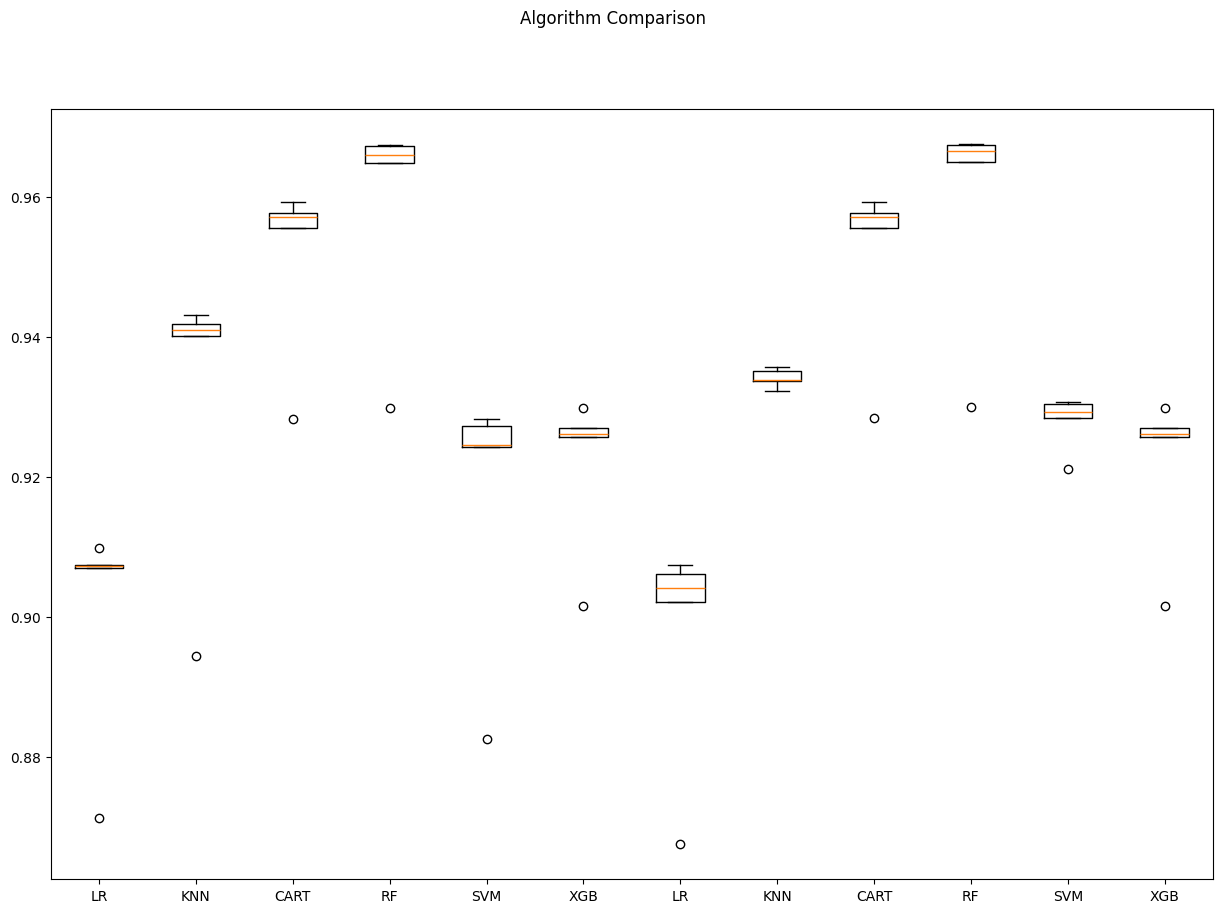

In [15]:
for name, model in models:
        kfold = KFold(n_splits = 10, shuffle=True, random_state = 12345)
        cv_results = cross_val_score(model, X_train_smote, y_train_smote, cv = 5, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = f"{name}: Accuracy = {cv_results.mean()*100:.2f}%, Std Dev = {cv_results.std()*100:.2f}%"
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 6) Model Tuning

### 1) Random Forests Tuning

In [48]:
rf_params = {"n_estimators" :[100,200,500,1000], 
             "max_features": [3,5,7], 
             "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8,None]}
rf_model = RandomForestClassifier(random_state = 12345)

In [49]:
gs_cv = GridSearchCV(rf_model, 
                    rf_params,
                    cv = 10,
                    n_jobs = -1,
                    verbose = 2).fit(X, y)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


KeyboardInterrupt: 

In [ ]:
gs_cv.best_params_

NameError: name 'gs_cv' is not defined

### 1.1) Final Model Installation

In [ ]:
rf_tuned = RandomForestClassifier(**gs_cv.best_params_)
rf_tuned = rf_tuned.fit(X,y)
cross_val_score(rf_tuned, X, y, cv = 10).mean()

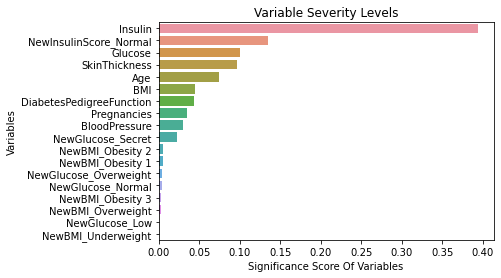

In [ ]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

### 2) XGBoost Tuning

In [ ]:
xgb = GradientBoostingClassifier(random_state = 12345)

In [ ]:
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2, 1],
    "min_samples_split": np.linspace(0.1, 0.5, 10),
    "max_depth":[3,5,8],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators": [100,1000]}

In [ ]:
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X, y)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 40.9min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed: 43.2min finished


In [ ]:
xgb_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_split': 0.1,
 'n_estimators': 100,
 'subsample': 1.0}

### 2.1) Final Model Installation

In [ ]:
xgb_tuned = GradientBoostingClassifier(**xgb_cv_model.best_params_).fit(X,y)

In [ ]:
cross_val_score(xgb_tuned, X, y, cv = 10).mean()

0.9013157894736843

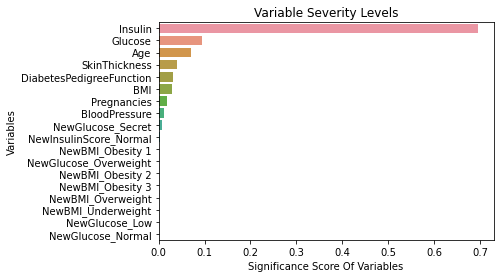

In [ ]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

# 7) Comparison of Final Models

In [ ]:
models = []

models.append(('RF', RandomForestClassifier(random_state = 12345, max_depth = 8, max_features = 7, min_samples_split = 2, n_estimators = 500)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345, learning_rate = 0.1, max_depth = 5, min_samples_split = 0.1, n_estimators = 100, subsample = 1.0)))

# evaluate each model in turn
results = []
names = []

RF: 0.897368 (0.034211)
XGB: 0.901316 (0.028373)
LightGBM: 0.896053 (0.033000)


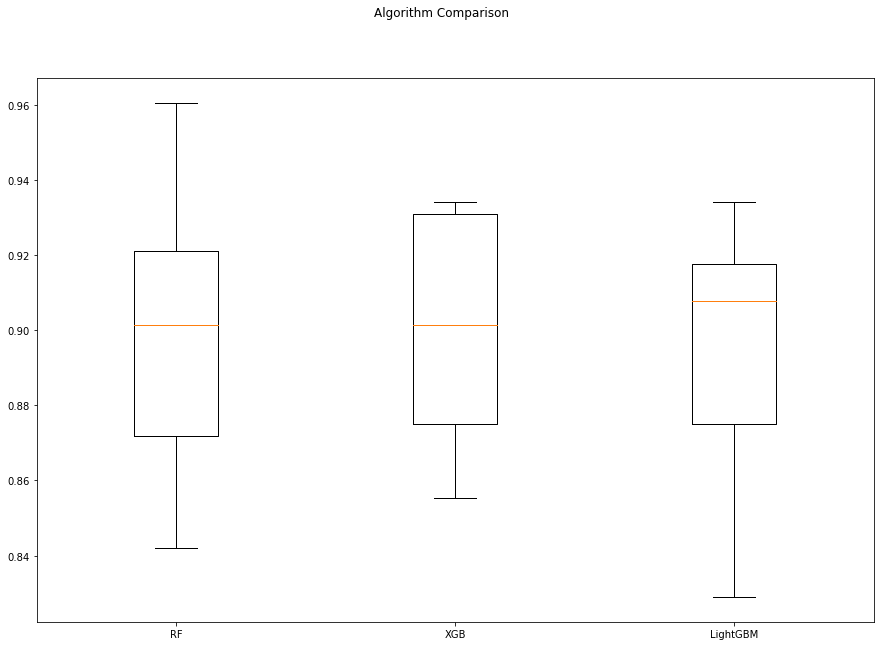

In [ ]:
for name, model in models:
    
        kfold = KFold(n_splits = 10, random_state = 12345)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 8) Reporting

The aim of this study was to create classification models for the diabetes data set and to predict whether a person is sick by establishing models and to obtain maximum validation scores in the established models. The work done is as follows:

1) Diabetes Data Set read.

2) With Exploratory Data Analysis; The data set's structural data were checked.
The types of variables in the dataset were examined. Size information of the dataset was accessed. The 0 values in the data set are missing values. Primarily these 0 values were replaced with NaN values. Descriptive statistics of the data set were examined.

3) Data Preprocessing section;
df for: The NaN values missing observations were filled with the median values of whether each variable was sick or not. The outliers were determined by LOF and dropped. The X variables were standardized with the rubost method..

4) During Model Building;
Logistic Regression, KNN, SVM, CART, Random Forests, XGBoost, LightGBM like using machine learning models Cross Validation Score were calculated. Later Random Forests, XGBoost, LightGBM hyperparameter optimizations optimized to increase Cross Validation value.

5) Result;
The model created as a result of XGBoost hyperparameter optimization became the model with the lowest Cross Validation Score value. (0.90)